In [1]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(42)

n = 1000
loan_amount = np.random.uniform(1000, 50000, n)
current_balance = loan_amount * np.random.uniform(0.1, 1.0, n)
credit_score = np.random.normal(700, 50, n)

beta_mean = (current_balance / loan_amount) * 0.8 + (credit_score - 600) / 1000 * 0.2
beta_mean = np.clip(beta_mean, 0.1, 1)

beta_precision = 20
EAD = stats.beta.rvs(beta_mean * beta_precision, (1 - beta_mean) * beta_precision)

data_ead = pd.DataFrame({
    'LoanAmount': loan_amount,
    'CurrentBalance': current_balance,
    'CreditScore': credit_score,
    'EAD': EAD
})

In [2]:
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel
from sklearn.model_selection import train_test_split

# Prepare the data
X_ead = data_ead[['LoanAmount', 'CurrentBalance', 'CreditScore']]
Y_ead = data_ead['EAD']

# Split the data
X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(X_ead, Y_ead, test_size=0.2, random_state=42)

# Add constant term
X_train_ead_const = sm.add_constant(X_train_ead)

# Fit the beta regression model
model_ead = BetaModel(y_train_ead, X_train_ead_const)
results_ead = model_ead.fit()

# Print model summary
print(results_ead.summary())

                              BetaModel Results                               
Dep. Variable:                    EAD   Log-Likelihood:                 447.86
Model:                      BetaModel   AIC:                            -885.7
Method:            Maximum Likelihood   BIC:                            -862.3
Date:                Tue, 22 Oct 2024                                         
Time:                        15:11:42                                         
No. Observations:                 800                                         
Df Residuals:                     795                                         
Df Model:                           3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1670      0.325     -3.589      0.000      -1.804      -0.530
LoanAmount     -6.251e-05   2.79e-06    

/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 0.1173


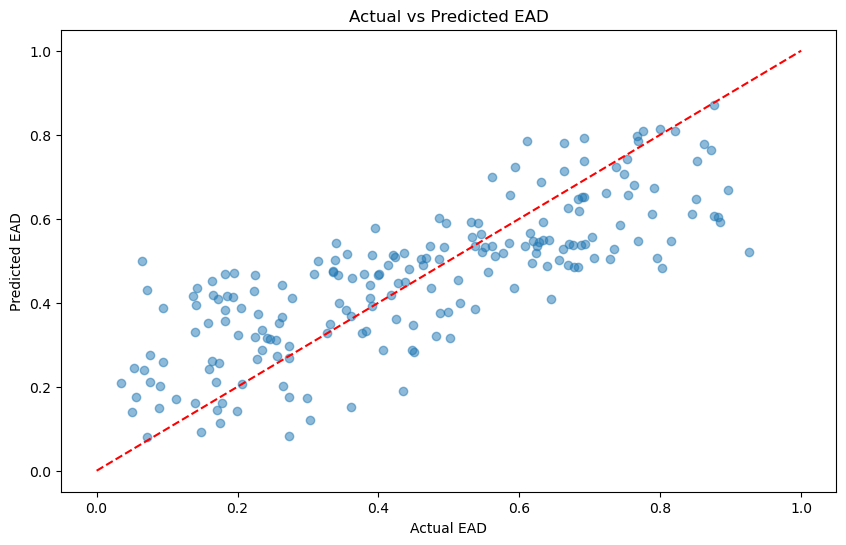

In [3]:
# Make predictions
X_test_ead_const = sm.add_constant(X_test_ead)
y_pred_ead = results_ead.predict(X_test_ead_const)

# Calculate Mean Absolute Error
mae_ead = np.mean(np.abs(y_test_ead - y_pred_ead))
print(f"Mean Absolute Error: {mae_ead:.4f}")

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_ead, y_pred_ead, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual EAD")
plt.ylabel("Predicted EAD")
plt.title("Actual vs Predicted EAD")
plt.show()